In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import numpy as np
np.random.seed(1) # NumPy
import random
random.seed(3) # Python

import pandas as pd
import mlfinlab as ml

# import warnings
# warnings.filterwarnings('ignore')

In /home/aaron/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/aaron/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/aaron/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [3]:
P_i = pd.read_csv('./data/intraday_etfs_2014_2019.csv').set_index('Unnamed: 0').dropna()
P_i.index = pd.to_datetime(P_i.index)

P_i = P_i.first('2Y')

P_i.sample(10)


,AMJ,AMLP,AMU,ATMP,BCM,BNO,BOIL,CANE,COPX,CORN,...,UGAZ,UGLD,UNL,URA,USCI,USLV,WEAT,YMLI,YMLP,ZSL
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2014-03-04 18:15:00,44.018,11.970,27.731,26.418,41.310,43.520,981.20,14.990,26.165,33.320,...,33625.00,17.360,20.170,31.998,58.380,56.690,15.25,14.821,55.666,37.095
2014-09-04 19:20:00,51.852,13.524,32.680,31.915,38.872,40.850,648.18,13.944,28.096,24.537,...,17250.00,14.170,17.418,25.458,57.280,38.430,12.16,16.737,58.445,43.390
2014-05-30 13:55:00,47.327,12.605,29.826,28.768,41.119,43.920,932.60,14.980,27.516,31.870,...,30375.00,14.000,19.900,25.650,60.140,38.840,15.21,15.610,56.691,45.062
2014-12-01 16:25:00,46.130,12.623,29.091,29.876,34.300,28.220,598.40,12.511,21.024,25.860,...,14362.50,11.800,16.958,21.474,52.796,22.340,12.66,15.605,45.746,56.025
2014-10-17 14:55:00,49.360,13.107,31.084,30.362,36.062,34.290,598.20,13.170,23.013,24.510,...,14963.75,13.120,16.980,20.193,54.254,27.961,11.53,16.197,53.603,51.900
2014-06-16 14:10:00,48.765,12.877,30.627,29.616,41.068,45.498,1006.00,14.860,26.881,30.680,...,34087.50,14.760,20.510,24.908,60.489,43.271,14.22,15.894,57.315,41.910
2014-06-09 16:10:00,48.698,12.870,30.675,29.509,40.790,44.056,1002.60,14.690,27.381,30.870,...,34130.00,14.040,20.280,24.549,60.090,39.820,14.76,15.895,57.097,44.315
2014-12-18 19:15:00,44.030,12.309,27.768,29.420,32.689,23.280,495.00,11.945,19.974,27.440,...,10600.00,11.679,15.960,20.159,49.530,20.096,13.90,15.213,41.347,58.400
2014-09-22 15:10:00,51.877,13.484,32.648,31.906,37.320,38.670,645.00,12.800,25.389,23.270,...,17025.00,12.510,17.560,23.832,55.020,30.379,10.75,16.700,57.681,50.211


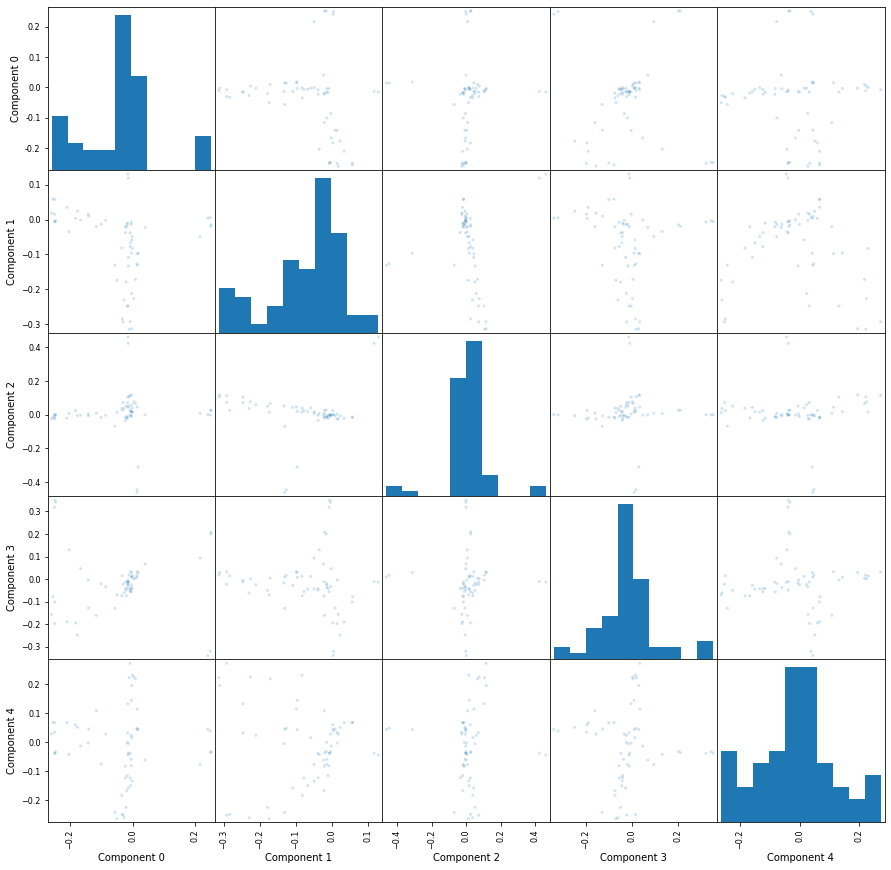

In [4]:
ps = ml.statistical_arbitrage.PairsSelector(P_i)
ps.dimensionality_reduction_by_components(5)
ps.plot_pca_matrix()

<IPython.core.display.Javascript object>


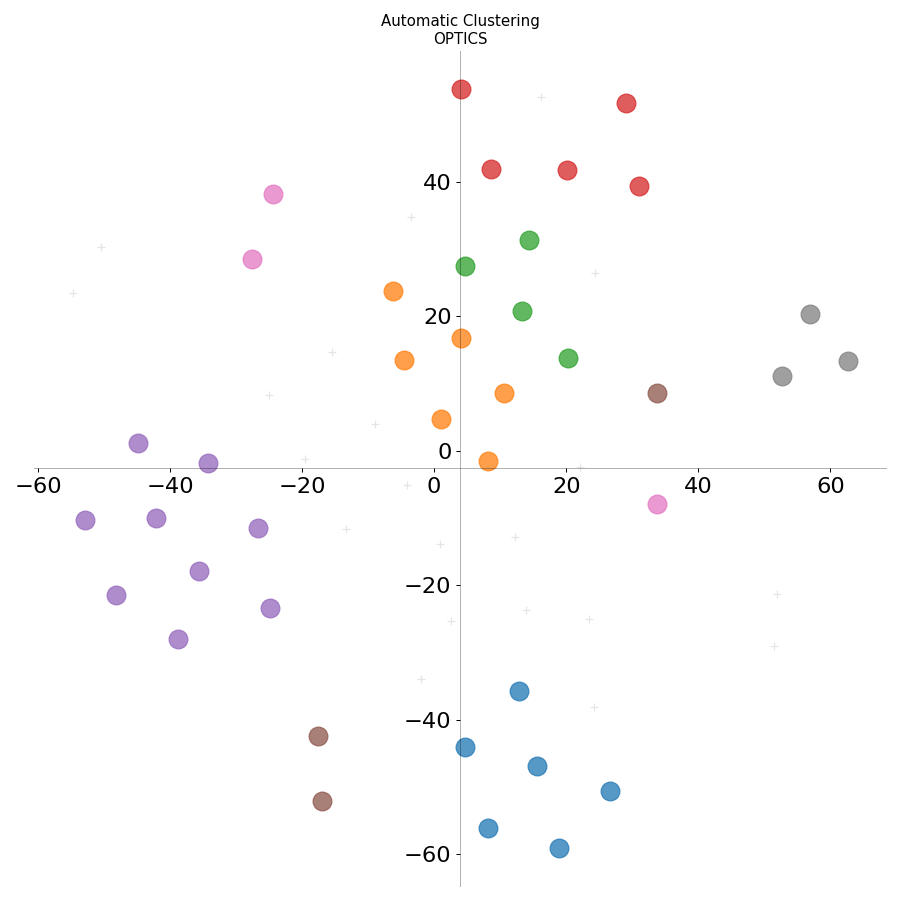

In [5]:
%matplotlib notebook

ps.cluster_using_optics({'min_samples': 3, 'max_eps': 2, 'xi': 0.05})
ps.plot_clustering_info(2, method='OPTICS')

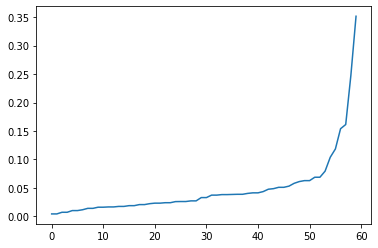

In [19]:
%matplotlib inline

ps.plot_knee_plot() # add labels to x and y axis

<IPython.core.display.Javascript object>


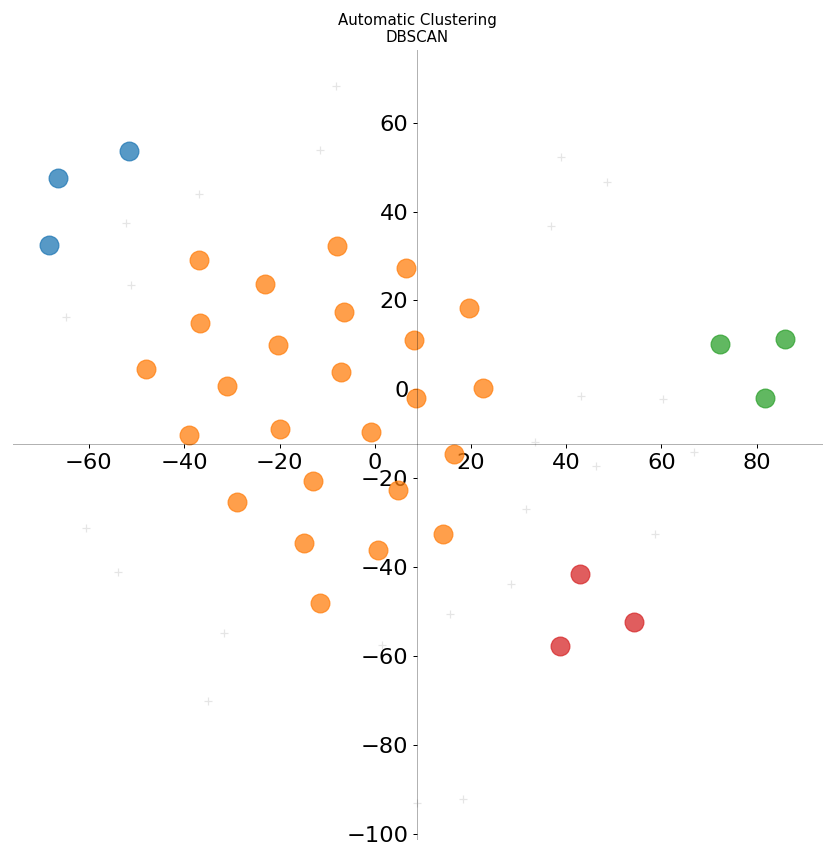

In [9]:
%matplotlib notebook

ps.cluster_using_dbscan({'eps': 0.06, 'min_samples': 3, 'metric':'euclidean'})
ps.plot_clustering_info(2, method='DBSCAN')

In [29]:
import itertools 

no_category_pairs = list(itertools.combinations(P_i.columns, 2))

len(no_category_pairs)

1770

In [ ]:
# ps.manual_candidate_pair_selector(no_category_pairs)

In [6]:
ps.criterion_selector(pvalue_threshold=0.1)

2020-11-05 07:40:50.900224 100.0% _outer_cointegration_loop done after 24.0 minutes. Remaining 0.0 minutes....
2020-11-05 07:40:56.442615 100.0% _outer_ou_loop_light done after 0.01 minutes. Remaining 0.0 minutes.
/home/aaron/Apprenticeship/mlfinlab_premium/mlfinlab/statistical_arbitrage/pairs_selector.py:335: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/aaron/Apprenticeship/mlfinlab_premium/mlfinlab/statistical_arbitrage/pairs_selector.py:339: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



array([('AMJ', 'AMU'), ('AMLP', 'MLPA'), ('BOIL', 'UNL'),
       ('CANE', 'DJCI'), ('CANE', 'FTGC'), ('CANE', 'SOYB'),
       ('CANE', 'UCI'), ('DJCI', 'FTGC'), ('DJCI', 'UCI'),
       ('GLDI', 'GLTR'), ('GLDI', 'PPLT'), ('GLDI', 'SGOL'),
       ('GLDI', 'SIVR'), ('GLDI', 'SLVO'), ('GLDI', 'UGLD'),
       ('GLTR', 'PPLT'), ('GLTR', 'SLVO'), ('JNUG', 'NUGT'),
       ('PPLT', 'SGOL'), ('PPLT', 'SIVR'), ('PPLT', 'SLVO'),
       ('PPLT', 'UGLD'), ('PPLT', 'USLV'), ('SIVR', 'SLVO'),
       ('SIVR', 'USLV'), ('SLVO', 'UGLD'), ('SLVO', 'USLV'),
       ('SOYB', 'WEAT'), ('UGAZ', 'UNL')], dtype=object)

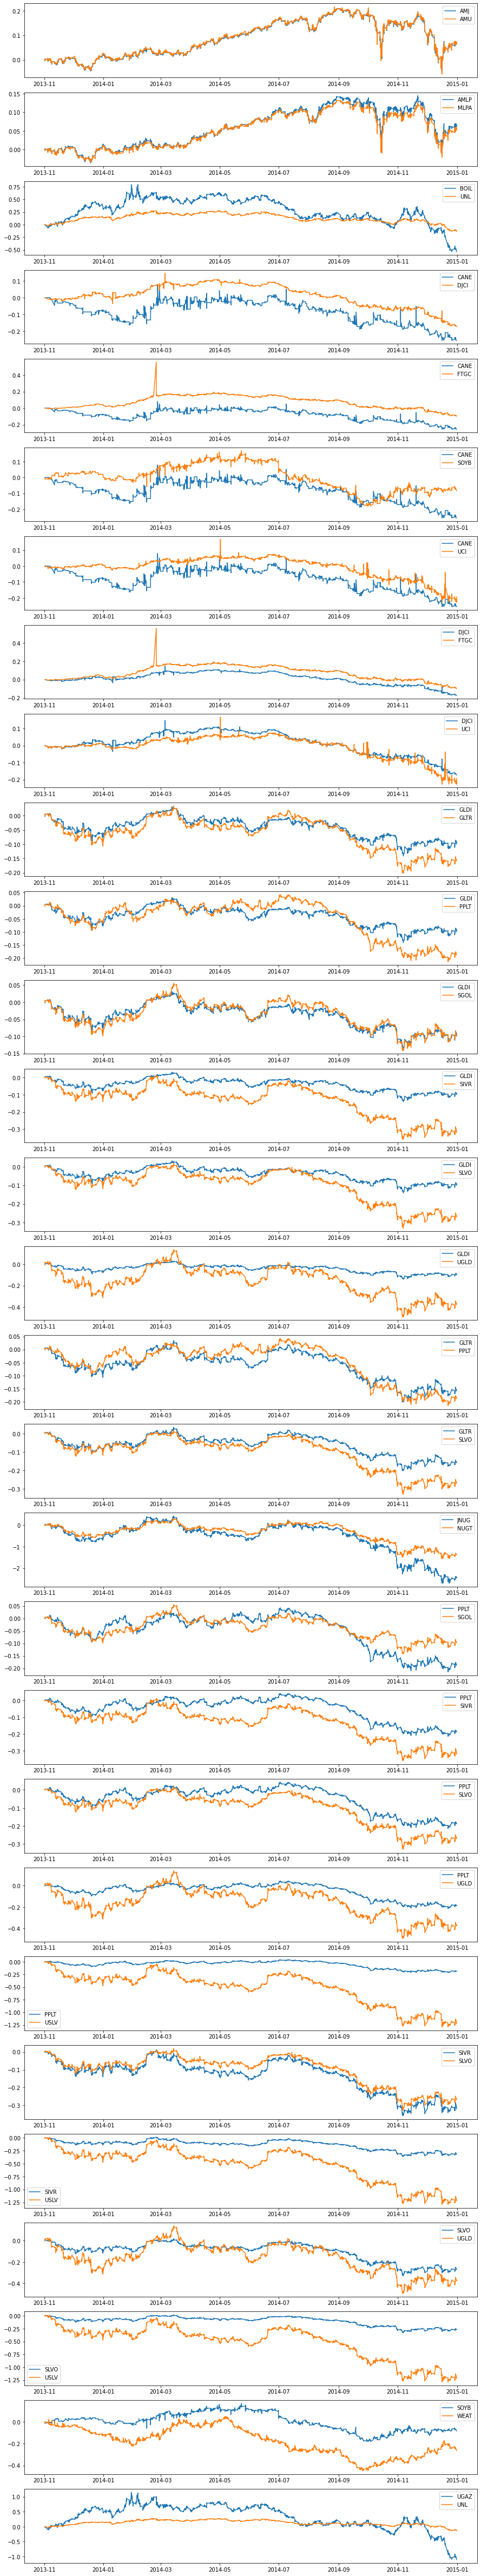

In [7]:
%matplotlib inline

ps.plot_selected_pairs()

In [23]:
__df = pd.read_pickle('./data/pairs_unsupervised_learning_optical_intraday.pickle')


In [22]:
pd.DataFrame(ps.final_pairs.index)

,0
0,"(AMJ, AMU)"
1,"(AMLP, MLPA)"
2,"(BOIL, UNL)"
3,"(CANE, DJCI)"
4,"(CANE, FTGC)"
5,"(CANE, SOYB)"
6,"(CANE, UCI)"
7,"(DJCI, FTGC)"
8,"(DJCI, UCI)"
9,"(GLDI, GLTR)"


In [24]:
pd.DataFrame(__df).loc[:, [1,0]]

,1,0
0,PXI,PXE
1,GCC,DBA
2,RJA,GCC
3,RJI,GSP
4,UGL,DGP
